In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"D:\data analyst\datasets\archive\car data.csv")

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Data Exploration and Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [10]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [11]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object


In [13]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [14]:
categorical_columns = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].unique())


Unique values in Fuel_Type:
['Petrol' 'Diesel' 'CNG']

Unique values in Selling_type:
['Dealer' 'Individual']

Unique values in Transmission:
['Manual' 'Automatic']

Unique values in Owner:
[0 1 3]


In [15]:
df['Car_Age'] = 2024 - df['Year']  

df.drop('Year', axis=1, inplace=True)

In [17]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

### OneHotEncoding for Fuel_Type

In [18]:
fuel_type_encoder = OneHotEncoder()
fuel_type_encoded = fuel_type_encoder.fit_transform(df[['Fuel_Type']]).toarray()
fuel_type_labels = fuel_type_encoder.get_feature_names_out(['Fuel_Type'])
df[fuel_type_labels] = fuel_type_encoded
df.drop('Fuel_Type', axis=1, inplace=True)

### LabelEncoding for Selling_type and Transmission

In [19]:
label_encoder = LabelEncoder()
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])

In [20]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,3.35,5.59,27000,0,1,0,10,0.0,0.0,1.0
1,sx4,4.75,9.54,43000,0,1,0,11,0.0,1.0,0.0
2,ciaz,7.25,9.85,6900,0,1,0,7,0.0,0.0,1.0
3,wagon r,2.85,4.15,5200,0,1,0,13,0.0,0.0,1.0
4,swift,4.60,6.87,42450,0,1,0,10,0.0,1.0,0.0


### Scale numerical features

In [21]:
scaler = StandardScaler()
numerical_features = ['Present_Price', 'Driven_kms', 'Car_Age']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [22]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Selling_type,Transmission,Owner,Car_Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,ritz,3.35,-0.236256,-0.256224,0,1,0,-0.128897,0.0,0.0,1.0
1,sx4,4.75,0.221544,0.155911,0,1,0,0.217514,0.0,1.0,0.0
2,ciaz,7.25,0.257472,-0.773969,0,1,0,-1.168129,0.0,0.0,1.0
3,wagon r,2.85,-0.403151,-0.817758,0,1,0,0.910335,0.0,0.0,1.0
4,swift,4.60,-0.087906,0.141743,0,1,0,-0.128897,0.0,1.0,0.0


In [23]:
print("Mean and standard deviation after scaling:")
print(df[['Present_Price', 'Driven_kms', 'Car_Age']].mean())  
print(df[['Present_Price', 'Driven_kms', 'Car_Age']].std())   


print("\nFuel type one-hot encoding check:")
print(df[['Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']].sum(axis=1).unique())

print("\nFirst few rows of the dataset after preprocessing:")
print(df.head())


Mean and standard deviation after scaling:
Present_Price   -4.721214e-17
Driven_kms       5.901518e-17
Car_Age         -2.537653e-16
dtype: float64
Present_Price    1.001665
Driven_kms       1.001665
Car_Age          1.001665
dtype: float64

Fuel type one-hot encoding check:
[1.]

First few rows of the dataset after preprocessing:
  Car_Name  Selling_Price  Present_Price  Driven_kms  Selling_type  \
0     ritz           3.35      -0.236256   -0.256224             0   
1      sx4           4.75       0.221544    0.155911             0   
2     ciaz           7.25       0.257472   -0.773969             0   
3  wagon r           2.85      -0.403151   -0.817758             0   
4    swift           4.60      -0.087906    0.141743             0   

   Transmission  Owner   Car_Age  Fuel_Type_CNG  Fuel_Type_Diesel  \
0             1      0 -0.128897            0.0               0.0   
1             1      0  0.217514            0.0               1.0   
2             1      0 -1.168129       

## Scaling:
The mean of the scaled features (Present_Price, Driven_kms, Car_Age) is very close to 0, and the standard deviation is approximately 1

## One-Hot Encoding:
The sum for each row across the one-hot encoded columns (Fuel_Type_CNG, Fuel_Type_Diesel, Fuel_Type_Petrol) is 1, one-hot encoding has applied

## Encoded Features:
Selling_type and Transmission are encoded as binary values (0 and 1), for label encoding

## Feature Engineering:
The Car_Age feature is standardized.

#  Splitting the Data and Training the Model

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X=df.drop(['Car_Name', 'Selling_Price'], axis=1)
y=df['Selling_Price']

In [27]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [33]:
mse = mean_squared_error(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)
r_score = r2_score(y_pred,y_test)

In [37]:
rmse = mean_squared_error(y_test, y_pred, squared=False)

In [51]:
r={"mse":[rmse],"mae":[mae],"r_score":[r_score]}

In [52]:
pd.DataFrame(r)

,mse,mae,r_score
0,1.865838,1.216374,0.794668


In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [54]:
rf = RandomForestRegressor(random_state=42)

In [60]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [67]:
best_rf = grid_search.best_estimator_
best_para = grid_search.best_params_

In [68]:
best_para

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [70]:
y_pred_rf = best_rf.predict(X_test)

In [71]:
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

In [75]:
from sklearn.tree import DecisionTreeRegressor

In [76]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [82]:
d_pred = dt.predict(X_test)

In [83]:
d_mae = mean_squared_error(d_pred,y_test)

In [85]:
dt_rscore = r2_score(d_pred,y_test)

In [92]:
results = {"Model":["Linear Regression","Decision tree","Random forest"],
           "Mse":[rmse,d_mae,rmse_rf],
          "R2_score":[r_score,dt_rscore,r2_rf]}

results_df = pd.DataFrame(results)
results_df

,Model,Mse,R2_score
0,Linear Regression,1.865838,0.794668
1,Decision tree,1.316590,0.935792
2,Random forest,0.914075,0.963729


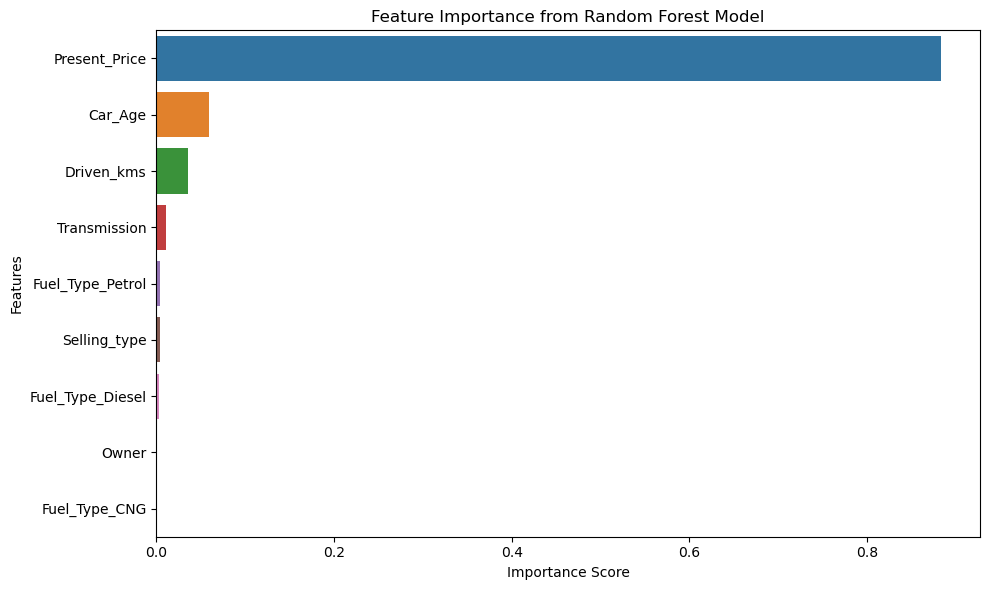

In [93]:
importances = best_rf.feature_importances_

features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
